In [1]:
import sys, os
from time import time
if '../' not in sys.path:
    sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from modules.paths import Experiment
from modules.stacks import ImageStack


%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
control_path = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/control/slices/w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A'
mutant_path = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/perturbation/slices/w-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A'

In [3]:
""" Load measurements. """
control_paths = Experiment(control_path)
mutant_paths = Experiment(mutant_path)
control = control_paths.compile_measurements()
mutants = mutant_paths.compile_measurements()

In [ ]:
# import gc
# gc.collect()

In [4]:
disc = mutant_paths.discs['perturbation_34']
stack = disc.load_imagestack()

In [5]:
disc_df = disc.load_measurements()

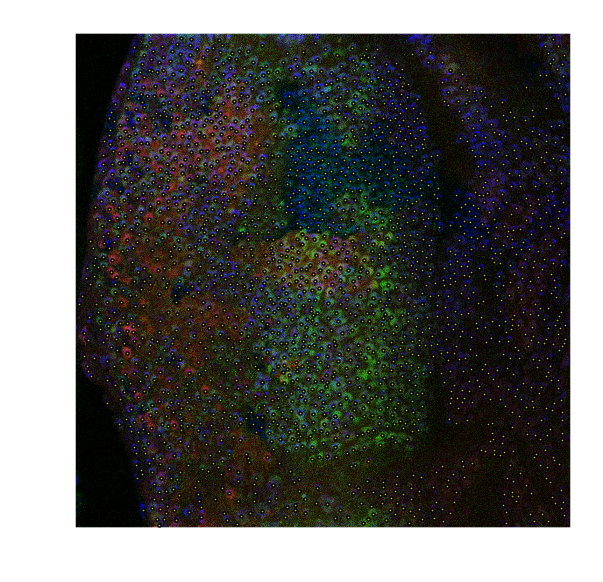

In [75]:
layer_id = 0
im = stack.get_layer(layer_id)
fig = im.show(figsize=(7, 7))
ax = fig.axes[0]

df = disc_df[disc_df.layer==layer_id]
df['label'] = None

ax.scatter(*df[['centroid_y', 'centroid_x']].values.T, s=5, c='y')
_ = ax.axis('off')

In [ ]:
"""
Seg improvements:
1. save segmentation as .nonzero() + labels
2. save low res small version of segmented graphic
3. fix filenames
"""

In [44]:
from modules.kde import KDE
from modules.masking import FunctionMask, RBFMask
from modules.annotation import RBF

In [111]:
kde = KDE(df, bandwidth=100, n_clusters=2)
df['foreground'] = kde.mask

df['red'] = df.r/df.b

rbf = RBF(df, basis='red', smooth=1, function='multiquadric')
df['label'] = rbf.labels
label_names = {0: 'm', 1: 'h', 2:'w'}

In [71]:
# identify foreground (high density cell areas)

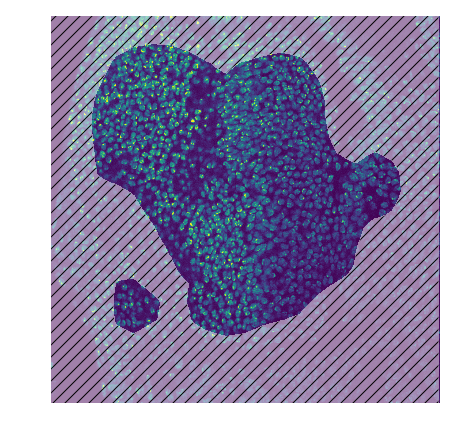

In [107]:
foreground_mask = FunctionMask(im.shape, kde)
dapi = im.get_channel('b')
fig = dapi.show(figsize=(5, 5))
foreground_mask.add_contourf(fig.axes[0], alpha=0.5)

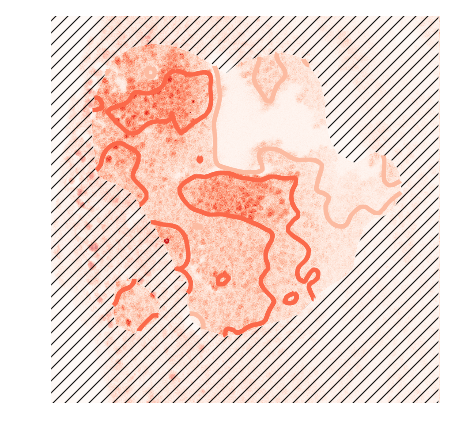

In [112]:
clone_mask = RBFMask(im.shape, rbf, mask=foreground_mask.values.mask, res=25)
yan = im.get_channel('r')
fig = yan.show(figsize=(5, 5), cmap=plt.cm.Reds)
ax = fig.axes[0]
foreground_mask.add_contourf(ax, alpha=0.5)
#clone_mask.add_contourf(ax, alpha=.5)
clone_mask.add_contour(ax, alpha=1)

In [122]:
'perturbation_27'.lstrip('control_perturbation')

'27'

In [119]:
'control2_27'.lstrip('control_perturbation')
'perturbation2_27'.lstrip('control_perturbation')

'2_27'

In [ ]:
str.lstrip()

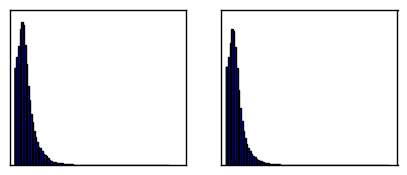

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(5, 2))
(ax0, ax1) = axes
control.pixel_count.hist(ax=ax0, bins=100, normed=True)
mutants.pixel_count.hist(ax=ax1, bins=100, normed=True)
for ax in axes:
    ax.set_yticks([])
    ax.set_xticks([])

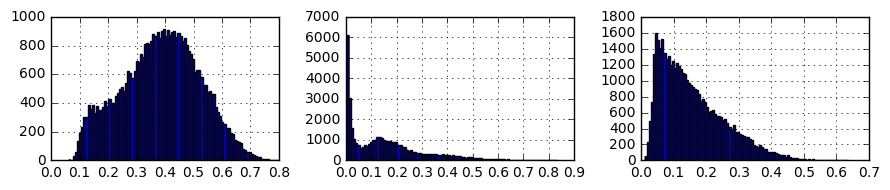

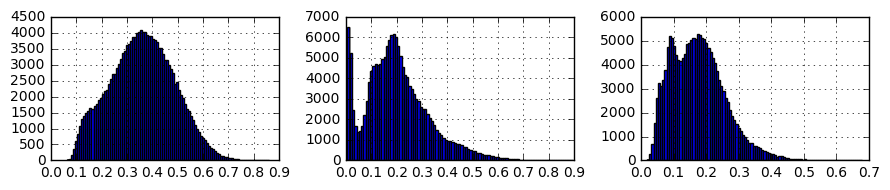

In [62]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(9, 2))
control.b.hist(ax=ax0, bins=100)
control.r.hist(ax=ax1, bins=100)
control.g.hist(ax=ax2, bins=100)
plt.tight_layout()

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(9, 2))
mutants.b.hist(ax=ax0, bins=100)
mutants.r.hist(ax=ax1, bins=100)
mutants.g.hist(ax=ax2, bins=100)
plt.tight_layout()

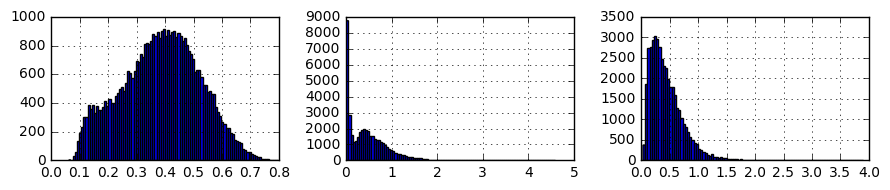

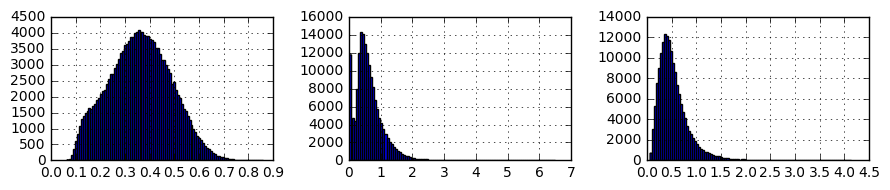

In [63]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(9, 2))
control.b.hist(ax=ax0, bins=100)
control.red.hist(ax=ax1, bins=100)
control.green.hist(ax=ax2, bins=100)
plt.tight_layout()

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(9, 2))
mutants.b.hist(ax=ax0, bins=100)
mutants.red.hist(ax=ax1, bins=100)
mutants.green.hist(ax=ax2, bins=100)
plt.tight_layout()

In [64]:
len(control)

43517

In [65]:
len(mutants)

166410